In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
pd.set_option('display.max_columns', None)


In [73]:
mouse_metadata_path = '../Instructions/Mouse_metadata.csv'
study_results_path = '../Instructions/Study_results.csv'

In [74]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.info()

study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [75]:
# Combine the data into a single dataset
df_merg=pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = 'left')
df_merg.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [76]:
# Display the number of unique mice IDs in the data
df_merg["Mouse ID"]. nunique()

249

In [77]:
# check for any mouse ID with duplicate time points. 
# Display the data associated with that mouse ID,

df_merg["dupl"]=df_merg["Mouse ID"]+df_merg["Timepoint"].astype(str)
duplicate = df_merg[df_merg.duplicated('dupl')]
duplicate







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),dupl
137,g989,0,45.000000,0,Propriva,Female,21,26,g9890
360,g989,5,47.570392,0,Propriva,Female,21,26,g9895
681,g989,10,49.880528,0,Propriva,Female,21,26,g98910
869,g989,15,53.442020,0,Propriva,Female,21,26,g98915
1111,g989,20,54.657650,1,Propriva,Female,21,26,g98920


In [78]:
 df_merg= df_merg.drop('dupl',axis=1)

In [79]:
 
# and then create a new DataFrame where this data is removed.

df_uniq=df_merg.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='last')
df_uniq


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [80]:
# Display the updated number of unique mice IDs.

df_uniq["Mouse ID"]. nunique()



249

In [81]:
# Create a DataFrame of summary statistics. Remember, there is more than one method to produce the results you're after, 
# so the method you use is less important than the result.

# Your summary statistics should include:

# A row for each drug regimen. These regimen names should be contained in the index column.

# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.
    
drug_mean=df_uniq.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "mean"})
drug_median=df_uniq.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "median"})
drug_median=df_uniq.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "median"})
drug_var=df_uniq.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "var"})
drug_std=df_uniq.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "std"})
drug_sem=df_uniq.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": "sem"})

df_drug_grp= pd.DataFrame()
df_drug_grp["Mean"]=drug_mean
df_drug_grp["Median"]=drug_median
df_drug_grp["Variance"]=drug_var
df_drug_grp["Standard Deviation"]=drug_std
df_drug_grp["SEM"]=drug_sem
df_drug_grp


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# Create Bar Charts and Pie Charts
# Generate two bar charts. Both charts should be identical and show the total number of time points for all mice tested 
# for each drug regimen throughout the study.
# Create the first bar chart with the Pandas DataFrame.plot() method.

# Create the second bar chart with Matplotlib's pyplot methods.




In [83]:
union_cnts=df_uniq.groupby("Drug Regimen")
df2=union_cnts.count()
df2
union_cnts_time_point=df2.loc[:, "Timepoint"]
union_cnts_time_point
# union_cnts_time_point.value_count()
# union_cnts.count()
#union_cnts.value_count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

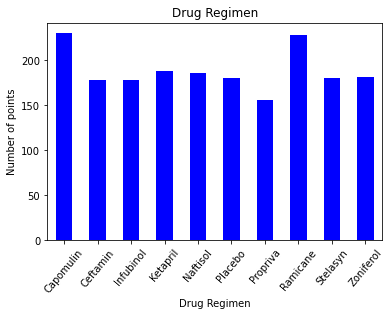

In [84]:
# union_cnts=df_uniq.groupby(["Drug Regimen"]).agg({"Timepoint": "count"})
# union_cnts
union_cnts_time_point.plot(kind="bar", title="Drug Regimen", color="blue", rot=50, ylabel="Number of points")
plt.show()

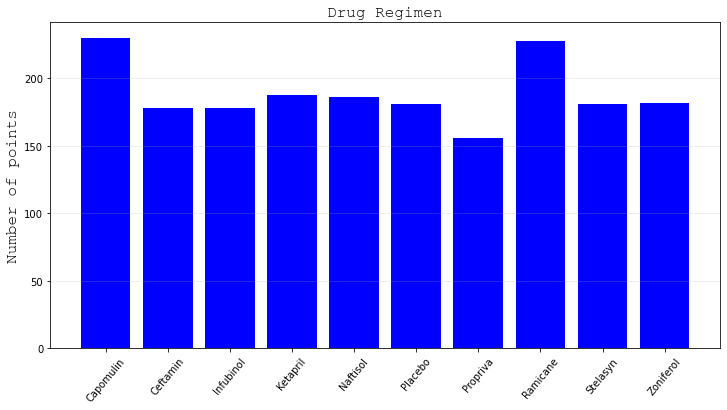

In [85]:
# step 1, get the data
x = union_cnts_time_point.index
y = union_cnts_time_point

# step 2 - make/init the plot
fig = plt.figure(figsize=(12, 6))
plt.bar(x, y,  color="blue")

# step 3 - customization
plt.ylabel("Number of points", fontname = "Courier New", fontsize=16)
plt.title("Drug Regimen", fontsize=16, fontname = "Courier New")
plt.xticks(rotation=50)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()



In [86]:
# Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.



# Create the first pie chart with the Pandas DataFrame.plot() method.

# Create the second pie chart with Matplotlib's pyplot methods.




In [87]:
df3=df_uniq.groupby("Sex").agg({"Mouse ID": "size"})

df3

,Mouse ID
Sex,
Female,930
Male,958


<AxesSubplot:title={'center':'Sex'}, ylabel='Mouse ID'>

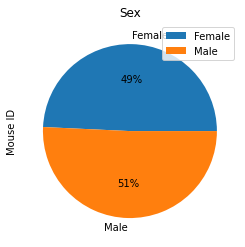

In [88]:
df3.plot(kind="pie", title="Sex", y="Mouse ID", autopct='%1.0f%%')

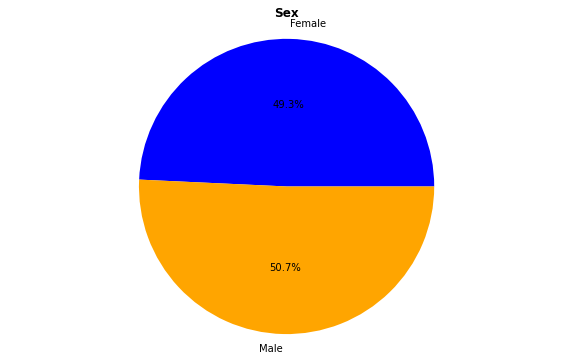

In [89]:
# step 1, get the data
pies = ["Female", "Male"]
pie_votes = [930, 958]

# for customization
colors = ["blue", "orange"]
explode = (0, 0)

# step 2, init the plot
fig = plt.figure(figsize=(10,6))
plt.pie(pie_votes, labels=pies, colors=colors, explode=explode, autopct="%1.1f%%", pctdistance=0.55, startangle=0)

# step 3 - customization
plt.title("Sex", fontweight="bold")
plt.axis("equal")

# step 4 - show the pie
plt.show()

In [90]:
# Calculate Quartiles, Find Outliers, and Create a Box Plot
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, 
# Infubinol, and Ceftamin. Then, calculate the quartiles and IQR, and determine if there are any potential outliers across 
# all four treatment regimens. Use the following substeps:

# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with 
# the original cleaned DataFrame.

# Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.

# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
# Append the resulting final tumor volumes for each drug to the empty list.

# Determine outliers by using the upper and lower bounds, and then print the results.

# Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each 
# treatment group. Highlight any potential outliers in the plot by changing their color and style.


In [91]:
df_uniq.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [92]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with 
# the original cleaned DataFrame
df_max=df_uniq.groupby("Mouse ID").agg({"Timepoint": "max"})
df_max

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [93]:
df_merg2=pd.merge(df_max, df_uniq, on = ["Mouse ID", "Timepoint"], how = 'inner')
df_merg2


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [94]:
mask=df_merg2["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df4=df_merg2.loc[mask].reset_index(drop=True)
df4



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


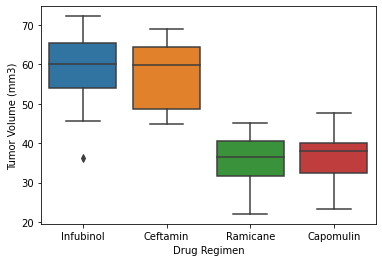

In [95]:
sn.boxplot(data=df4, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

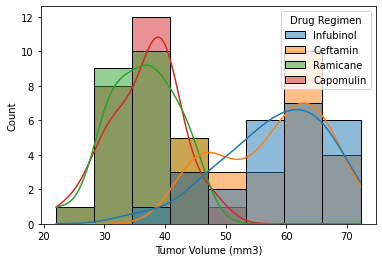

In [96]:
sns.histplot(data=df4, hue="Drug Regimen", x="Tumor Volume (mm3)", kde=True)
plt.show()

In [70]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

data = []

for drug in drugs:
    sub = df4.loc[df4["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    lower_q = sub.quantile(0.25)
    upper_q = sub.quantile(0.75)
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    
    mask = (df4["Drug Regimen"] == drug) & ((df4["Tumor Volume (mm3)"] > upper_bound) | (df4["Tumor Volume (mm3)"] < lower_bound))
    outliers = df4.loc[mask]
    print(outliers)
    
    data.append(sub)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
15     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
15  Female          18          25  
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


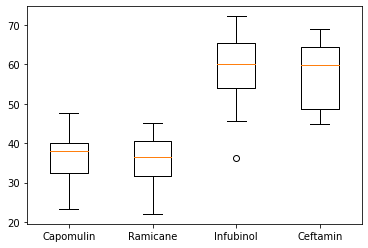

In [69]:
plt.boxplot(data, labels=drugs)
plt.show()

In [ ]:
# A line plot is generated that shows the tumor volume vs. time point for one mouse treated with Capomulin. (5 points)

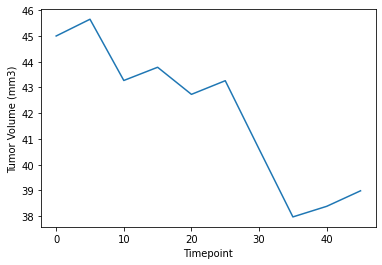

In [140]:
mask = df_uniq["Drug Regimen"] == "Capomulin" 
df4=df_uniq.loc[mask].reset_index(drop=True)
mask2 = df4["Mouse ID"] == "b128" 
df5=df4.loc[mask2].reset_index(drop=True)
df5.tail()

plt.plot(df5["Timepoint"], df5["Tumor Volume (mm3)"])


plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



In [ ]:
# A scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen. (5 points)

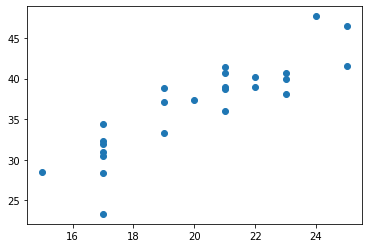

In [97]:
mask = df_merg2["Drug Regimen"] == "Capomulin"

data = df_merg2.loc[mask].groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()
plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"])
plt.show()